# Final project - Jane + ChatGPT

In [37]:
# run this if you have not installed pyDESeq2 or umap-learn
!pip install pyDESeq2
!pip install umap-learn

In [40]:
# the first step for most code 

# import libraries 

# standard libraries
import os
import pandas as pd
import numpy as np 
import scipy
from matplotlib import pyplot as plt

# differential expression
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

# dimentionality reduction and clustering
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
import umap
# Anaconda should automatically install all of these libraries, but if this does not work you might not 
# have these libraries installed. If this is the case, you can install them using pip install. 

In [4]:
# bulk data 
# import bulk data from jackson et al 
bulk_data = pd.read_csv("karim_etal_data.csv", sep=',', index_col=0).T 
bulk_data

Geneid,ENSG00000223972,ENSG00000227232,ENSG00000278267,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000239945,...,ENSG00000273532,ENSG00000276351,ENSG00000275661,ENSG00000277856,ENSG00000275063,ENSG00000271254,ENSG00000275405,ENSG00000275987,ENSG00000277475,ENSG00000268674
1,0,41,0,3,0,0,0,0,0,0,...,0,0,0,0,0,249,0,0,3,0
2,0,66,0,2,0,0,0,0,0,0,...,0,0,0,0,0,372,0,1,0,0
3,0,63,0,0,0,0,0,0,0,0,...,0,0,0,0,0,221,0,0,0,0
4,0,37,0,3,0,0,0,0,0,0,...,0,0,0,0,0,274,0,1,0,0
5,0,39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,232,0,0,0,0
6,0,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,235,0,0,0,0
7,0,52,4,0,0,0,0,0,0,0,...,0,0,0,0,0,259,0,0,0,0
8,0,51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,237,0,0,0,0
9,0,34,1,1,0,0,0,0,0,0,...,0,0,0,0,0,130,0,0,1,0
10,0,41,2,0,0,0,0,0,0,0,...,0,0,0,0,0,114,0,0,0,0


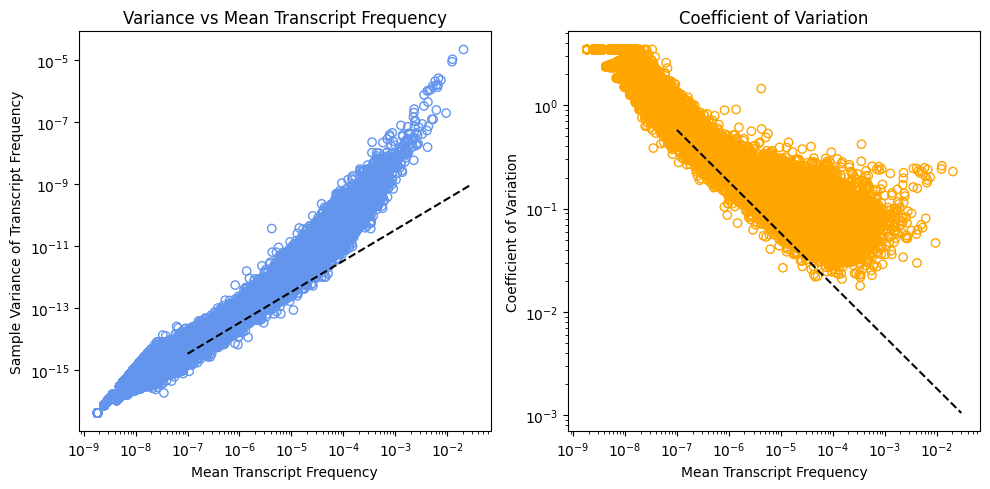

In [5]:
# SOLUTION
bulk_data_normalized = bulk_data.div(bulk_data.sum(axis=1), axis=0)
bulk_data_normalized

# compare mean to variance - see that poisson actually isn't a good deascription 
mean_values = bulk_data_normalized.mean()
var_values = bulk_data_normalized.var()

# Create the figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
freq_values = np.linspace(1E-7, 3E-2, 100)
n_samples = bulk_data.shape[0] #number of samples
n_transcripts = bulk_data.shape[1]
total_reads = bulk_data.values.sum()
n_reads = int(total_reads/n_samples) # number of reads per sample (sequencing depth)

ax1.plot(freq_values, freq_values/n_reads, c="black", ls="--")
ax1.scatter(mean_values, var_values, facecolor="none", edgecolor='cornflowerblue')
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.set_xlabel("Mean Transcript Frequency")
ax1.set_ylabel("Sample Variance of Transcript Frequency")
ax1.set_title("Variance vs Mean Transcript Frequency")

# Second subplot
ax2.scatter(mean_values, bulk_data_normalized.std(ddof=1)/mean_values, facecolor="none", edgecolor='orange')
ax2.plot(freq_values, np.sqrt(1/(freq_values*n_reads)), c="black", ls="--")
ax2.set_xscale('log'); ax2.set_yscale('log')
ax2.set_xlabel("Mean Transcript Frequency")
ax2.set_ylabel("Coefficient of Variation")
ax2.set_title("Coefficient of Variation")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()

In [6]:
# simulation of noise with a multinomial process

# extract parameters for the simulation from the bulk data
n_samples = bulk_data.shape[0] #number of samples
n_transcripts = bulk_data.shape[1]
total_reads = bulk_data.values.sum()
n_reads = int(total_reads/n_samples) # number of reads per sample (sequencing depth)
probabilities = bulk_data.sum(axis = 0).values/total_reads


# Array to store all samples
sample_counts = np.zeros((n_samples, n_transcripts), dtype=int)

# Sample n_samples times and store the results in a 2D array
# each row is a sample, each column is a gene
for i in range(n_samples):
    sample_counts[i] = np.random.multinomial(n_reads, probabilities)



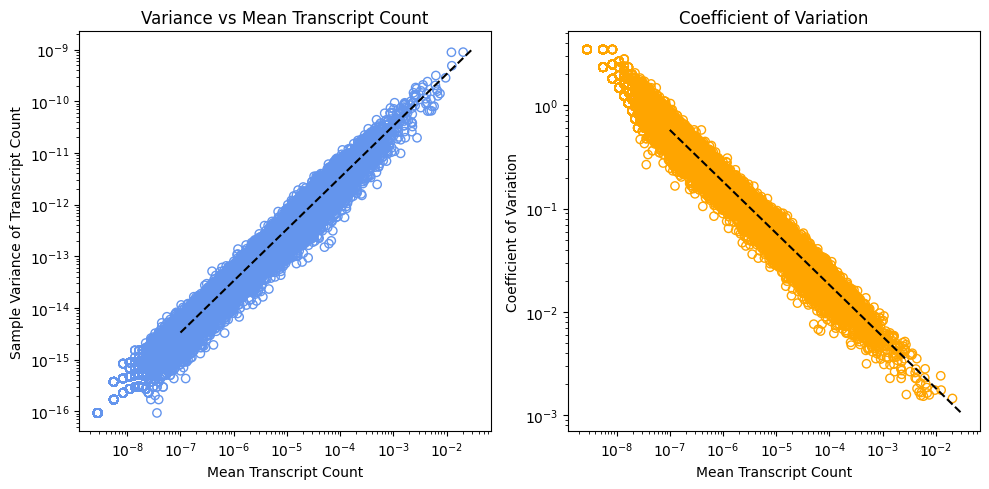

In [7]:
# SOLUTION
# Create the figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sample_counts = pd.DataFrame(sample_counts)
sample_counts_normalized = sample_counts.div(sample_counts.sum(axis=1), axis=0)
sample_counts_normalized

# First subplot
ax1.scatter(sample_counts_normalized.mean(axis = 0), sample_counts_normalized.var(ddof=1, axis = 0), facecolor="none", edgecolor='cornflowerblue')
ax1.plot(freq_values, freq_values/n_reads, c="black", ls="--")
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.set_xlabel("Mean Transcript Count")
ax1.set_ylabel("Sample Variance of Transcript Count")
ax1.set_title("Variance vs Mean Transcript Count")

# Second subplot
ax2.scatter(sample_counts_normalized.mean(axis = 0), sample_counts_normalized.std(ddof=1, axis = 0)/sample_counts_normalized.mean(axis = 0), facecolor="none", edgecolor='orange')
binom_pvals = np.linspace(1, np.max(sample_counts_normalized), 100)
ax2.plot(freq_values, np.sqrt(1/(freq_values*n_reads)), c="black", ls="--")
ax2.set_xscale('log'); ax2.set_yscale('log')
ax2.set_xlabel("Mean Transcript Count")
ax2.set_ylabel("Coefficient of Variation")
ax2.set_title("Coefficient of Variation")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()

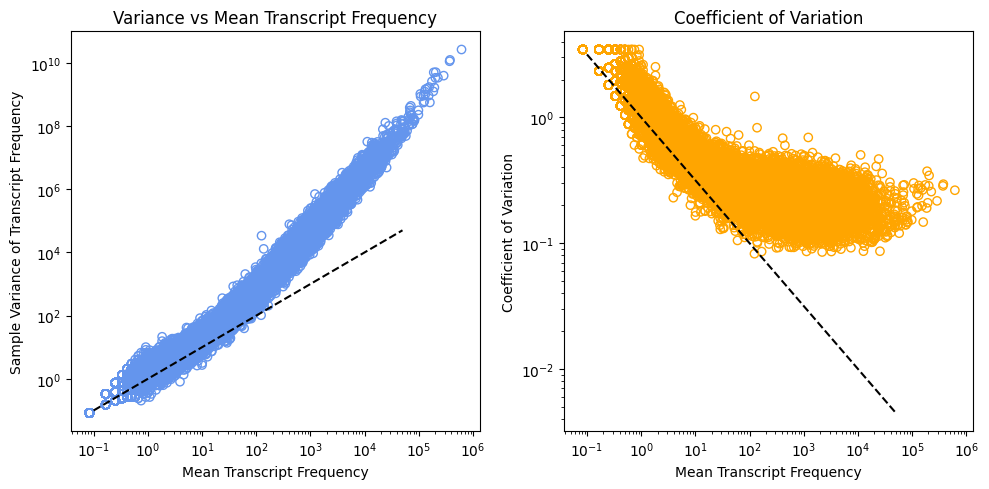

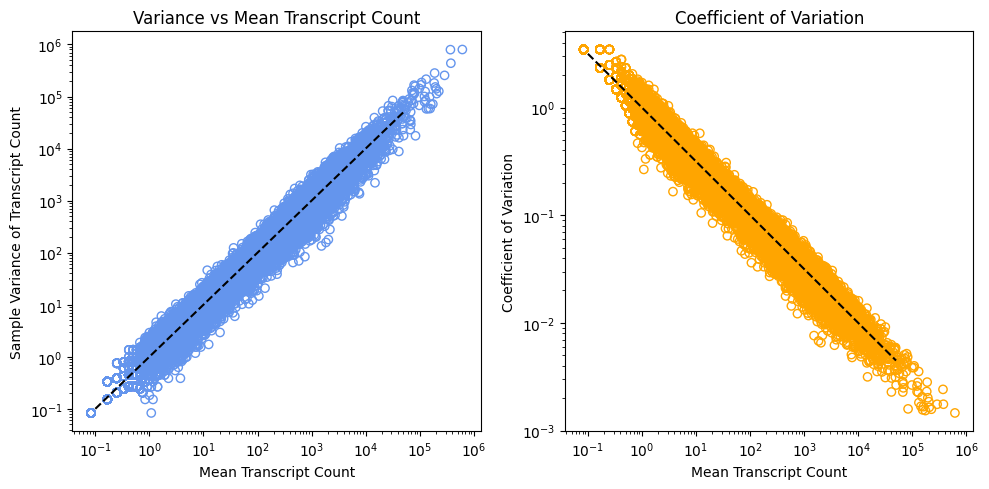

In [8]:
# SOLUTION plots for 1.1-1.4 using counts rather than frequency:

# data plots 

mean_values = bulk_data.mean()
var_values = bulk_data.var()

# Create the figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
count_values = np.linspace(1E-1, 5E4, 100)
n_samples = bulk_data.shape[0] #number of samples
n_transcripts = bulk_data.shape[1]
total_reads = bulk_data.values.sum()
n_reads = int(total_reads/n_samples) # number of reads per sample (sequencing depth)

ax1.plot(count_values, count_values, c="black", ls="--")
ax1.scatter(mean_values, var_values, facecolor="none", edgecolor='cornflowerblue')
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.set_xlabel("Mean Transcript Frequency")
ax1.set_ylabel("Sample Variance of Transcript Frequency")
ax1.set_title("Variance vs Mean Transcript Frequency")

# Second subplot
ax2.scatter(mean_values, bulk_data.std(ddof=1)/mean_values, facecolor="none", edgecolor='orange')
ax2.plot(count_values, 1/np.sqrt(count_values), c="black", ls="--")
ax2.set_xscale('log'); ax2.set_yscale('log')
ax2.set_xlabel("Mean Transcript Frequency")
ax2.set_ylabel("Coefficient of Variation")
ax2.set_title("Coefficient of Variation")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()

# simulation plots

# Create the figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sample_counts = pd.DataFrame(sample_counts)
sample_counts_normalized = sample_counts.div(sample_counts.sum(axis=1), axis=0)
sample_counts_normalized

# First subplot
ax1.scatter(sample_counts.mean(axis = 0), sample_counts.var(ddof=1, axis = 0), facecolor="none", edgecolor='cornflowerblue')
ax1.plot(count_values, count_values, c="black", ls="--")
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.set_xlabel("Mean Transcript Count")
ax1.set_ylabel("Sample Variance of Transcript Count")
ax1.set_title("Variance vs Mean Transcript Count")

# Second subplot
ax2.scatter(sample_counts.mean(axis = 0), sample_counts.std(ddof=1, axis = 0)/sample_counts.mean(axis = 0), facecolor="none", edgecolor='orange')
ax2.plot(count_values, 1/np.sqrt(count_values), c="black", ls="--")
ax2.set_xscale('log'); ax2.set_yscale('log')
ax2.set_xlabel("Mean Transcript Count")
ax2.set_ylabel("Coefficient of Variation")
ax2.set_title("Coefficient of Variation")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()

In [9]:
# Find the minimum non-zero value
min_value = bulk_data_normalized[bulk_data_normalized > 0].min().min()
print(f"Minimum non-zero normalized value: {min_value}")

# Check if epsilon is much smaller than the minimum non-zero normalized value
epsilon = 1e-12
if epsilon >= min_value:
    print("WARNING: Epsilon is not smaller than the minimum non-zero normalized value.")
else:
    # Replace zero values with epsilon
    bulk_data_normalized.replace(0, epsilon, inplace=True)
    print("Zero values have been replaced with epsilon")


Minimum non-zero normalized value: 2.216287103859735e-08
Zero values have been replaced with epsilon


Adjusted and Normalized Bulk Data Shape: (12, 57500)
Adjusted and Normalized Bulk Data Head:
Geneid  ENSG00000223972  ENSG00000227232  ENSG00000278267  ENSG00000243485  \
1          1.000000e-12         0.000001     1.000000e-12     9.518045e-08   
2          1.000000e-12         0.000001     1.000000e-12     4.432574e-08   
3          1.000000e-12         0.000002     1.000000e-12     1.000000e-12   
4          1.000000e-12         0.000001     1.000000e-12     8.944103e-08   
5          1.000000e-12         0.000001     1.000000e-12     1.000000e-12   

Geneid  ENSG00000237613  ENSG00000268020  ENSG00000240361  ENSG00000186092  \
1          1.000000e-12     1.000000e-12     1.000000e-12     1.000000e-12   
2          1.000000e-12     1.000000e-12     1.000000e-12     1.000000e-12   
3          1.000000e-12     1.000000e-12     1.000000e-12     1.000000e-12   
4          1.000000e-12     1.000000e-12     1.000000e-12     1.000000e-12   
5          1.000000e-12     1.000000e-12     1.0

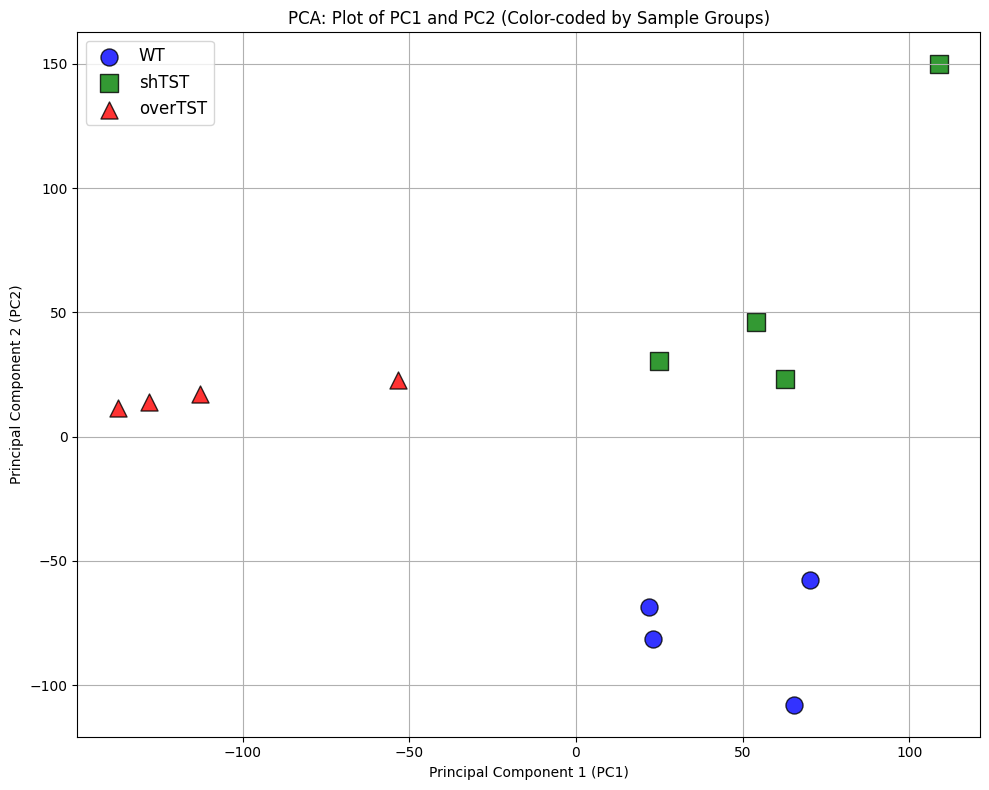

In [ ]:
# scaled data

# Display structure and first few rows of bulk_data_normalized
print("Adjusted and Normalized Bulk Data Shape:", bulk_data_normalized.shape)
print("Adjusted and Normalized Bulk Data Head:")
print(bulk_data_normalized.head())

# Normalize the data by standardizing (mean=0, std=1)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(bulk_data_normalized)

# Number of principal components to generate
n_PCA_Comps = 10

# Perform PCA on the normalized data
pca = PCA(n_components=n_PCA_Comps)
principal_components = pca.fit_transform(normalized_data)

# Create a DataFrame of the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_PCA_Comps)])
pca_df['Sample'] = bulk_data_normalized.index  # Add sample labels for color coding

# Define groups for color coding
def categorize_sample(sample):
    if sample in ['1', '2', '3', '4']:
        return 'WT'
    elif sample in ['5', '6', '7', '8']:
        return 'shTST'
    elif sample in ['9', '10', '11', '12']:
        return 'overTST'

pca_df['Group'] = pca_df['Sample'].apply(categorize_sample)

# View the first few rows of the PCA results
print("PCA DataFrame Head:")
print(pca_df.head())

# Plot the points in PC1 and PC2, color-coded by groups
plt.figure(figsize=(10, 8))

# Unique groups for color coding
unique_groups = pca_df['Group'].unique()
colors = ['blue', 'green', 'red']  # Distinct colors for better visualization
markers = ['o', 's', '^']  # Different markers for each group

for group, color, marker in zip(unique_groups, colors, markers):
    subset = pca_df[pca_df['Group'] == group]
    plt.scatter(subset['PC1'], subset['PC2'], marker=marker, s=150, color=color, label=group, alpha=0.8, edgecolor='k')

# Add labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA: Plot of PC1 and PC2 (Color-coded by Sample Groups)')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels/legend
plt.show()



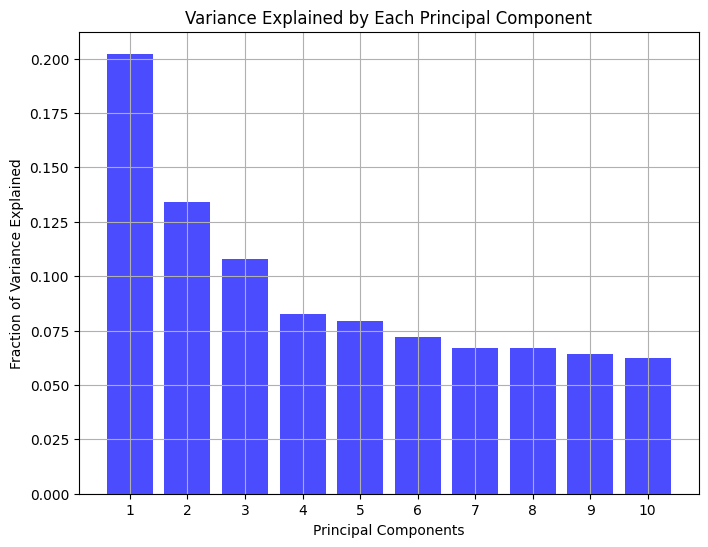

In [11]:
# Plot the variance explained by each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_PCA_Comps + 1), pca.explained_variance_ratio_, alpha=0.7, color='b')
plt.xlabel('Principal Components')
plt.ylabel('Fraction of Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, n_PCA_Comps + 1))
plt.grid(True)
plt.show()


In [12]:
sum(pca.explained_variance_ratio_)

0.9390972043428962

c:\ProgramData\Miniconda3\lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


UMAP DataFrame Head:
       UMAP1     UMAP2  Group
0  16.591127  2.628274     WT
1  15.022217  1.891638     WT
2  16.566450  2.111825     WT
3  13.459790  1.315551     WT
4  15.278318  2.768508  shTST


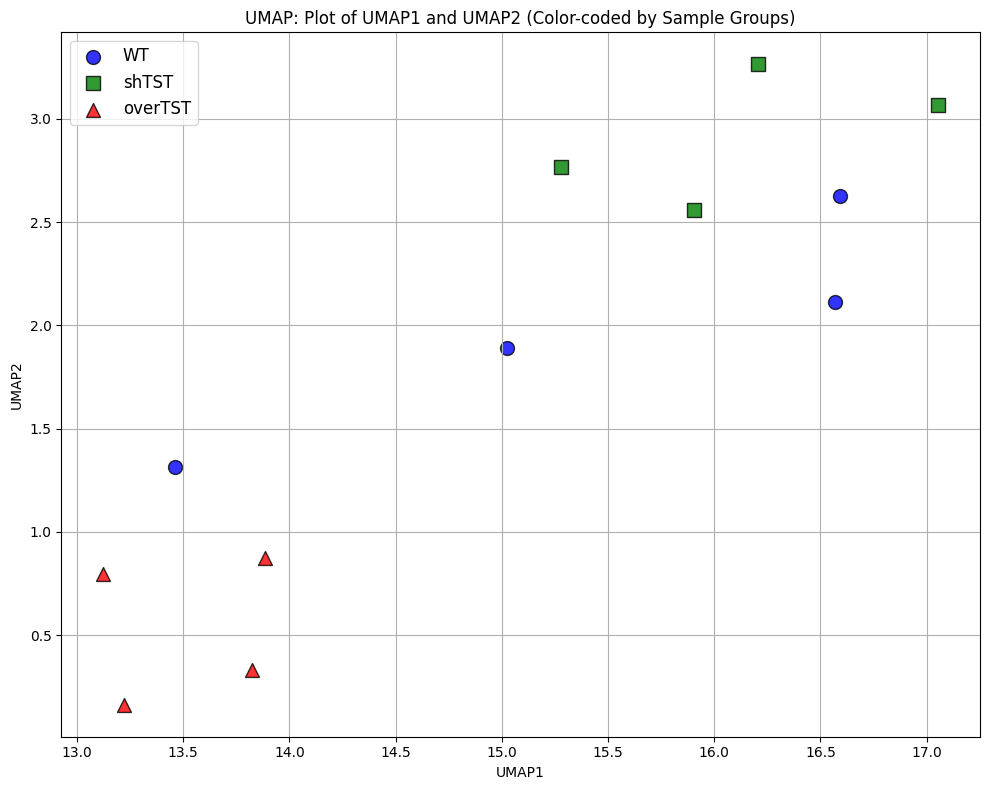

In [ ]:
# unscaled data

# Define groups for color coding
def categorize_sample(sample):
    if sample in ['1', '2', '3', '4']:
        return 'WT'
    elif sample in ['5', '6', '7', '8']:
        return 'shTST'
    elif sample in ['9', '10', '11', '12']:
        return 'overTST'

bulk_data_normalized.index = bulk_data_normalized.index.astype(str)
bulk_data_normalized['Group'] = bulk_data_normalized.index.map(categorize_sample)

# Separate the data from the groups
labels = bulk_data_normalized['Group']
data = bulk_data_normalized.drop('Group', axis=1)

# Perform UMAP
umap_model = umap.UMAP(n_components=2)
umap_components = umap_model.fit_transform(data)

# Create a DataFrame of the UMAP results
umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
umap_df['Group'] = labels.values

# View the first few rows of the UMAP results
print("UMAP DataFrame Head:")
print(umap_df.head())

# Plot the UMAP points, color-coded by group
plt.figure(figsize=(10, 8))

# Unique groups for color coding
unique_groups = umap_df['Group'].unique()
colors = ['blue', 'green', 'red']  # Using distinct colors for better visualization
markers = ['o', 's', '^']  # Different markers for each group

for group, color, marker in zip(unique_groups, colors, markers):
    subset = umap_df[umap_df['Group'] == group]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], marker=marker, s=100, color=color, label=group, alpha=0.8, edgecolor='k')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP: Plot of UMAP1 and UMAP2 (Color-coded by Sample Groups)')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels/legend
plt.show()


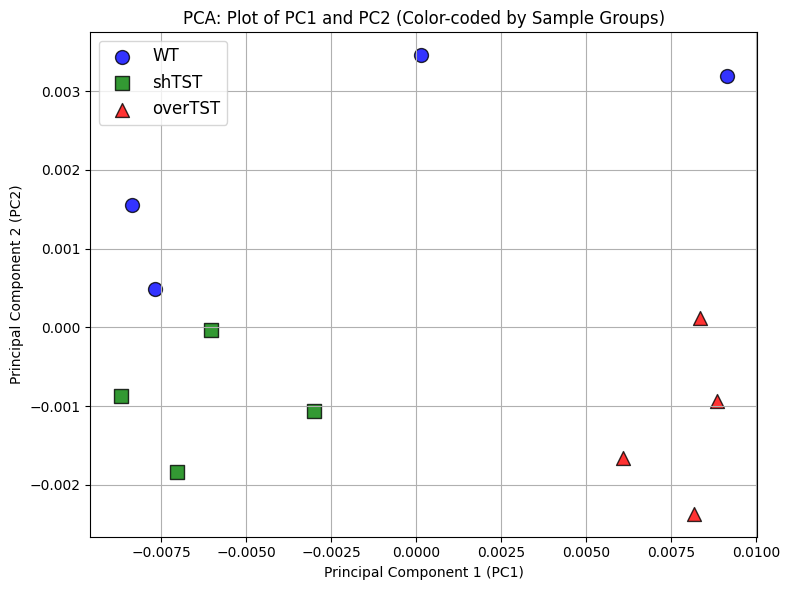

c:\ProgramData\Miniconda3\lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


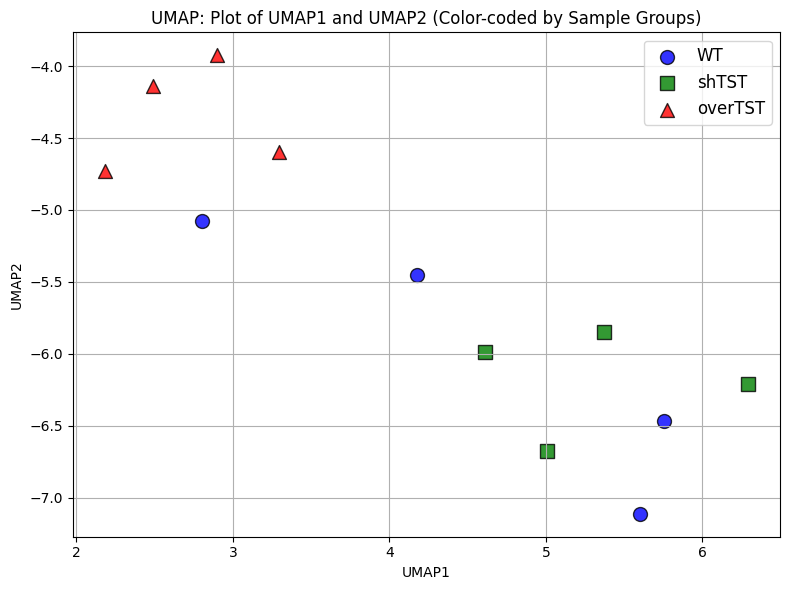

In [14]:
# unscaled data

# Separate the data from the groups
labels = bulk_data_normalized['Group']
data = bulk_data_normalized.drop('Group', axis=1)

# Perform PCA without additional scaling
n_PCA_Comps = 10
pca_model = PCA(n_components=n_PCA_Comps)
principal_components_unscaled = pca_model.fit_transform(data)
pca_unscaled_df = pd.DataFrame(data=principal_components_unscaled, columns=[f'PC{i+1}' for i in range(n_PCA_Comps)])
pca_unscaled_df['Group'] = labels.values

# Plot PCA results, color-coded by groups
plt.figure(figsize=(8, 6))

# Unique groups for color coding
unique_groups = pca_unscaled_df['Group'].unique()
colors = ['blue', 'green', 'red']  # Distinct colors for better visualization
markers = ['o', 's', '^']  # Different markers for each group

for group, color, marker in zip(unique_groups, colors, markers):
    subset = pca_unscaled_df[pca_unscaled_df['Group'] == group]
    plt.scatter(subset['PC1'], subset['PC2'], marker=marker, s=100, color=color, label=group, alpha=0.8, edgecolor='k')

# Add labels and title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA: Plot of PC1 and PC2 (Color-coded by Sample Groups)')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels/legend
plt.show()

# Perform UMAP without additional scaling
umap_model = umap.UMAP(n_components=2)
umap_components_unscaled = umap_model.fit_transform(data)
umap_unscaled_df = pd.DataFrame(data=umap_components_unscaled, columns=['UMAP1', 'UMAP2'])
umap_unscaled_df['Group'] = labels.values

# Plot UMAP results, color-coded by groups
plt.figure(figsize=(8, 6))

for group, color, marker in zip(unique_groups, colors, markers):
    subset = umap_unscaled_df[umap_unscaled_df['Group'] == group]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], marker=marker, s=100, color=color, label=group, alpha=0.8, edgecolor='k')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP: Plot of UMAP1 and UMAP2 (Color-coded by Sample Groups)')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels/legend
plt.show()


c:\ProgramData\Miniconda3\lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\ProgramData\Miniconda3\lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\ProgramData\Miniconda3\lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
c:\ProgramData\Miniconda3\lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


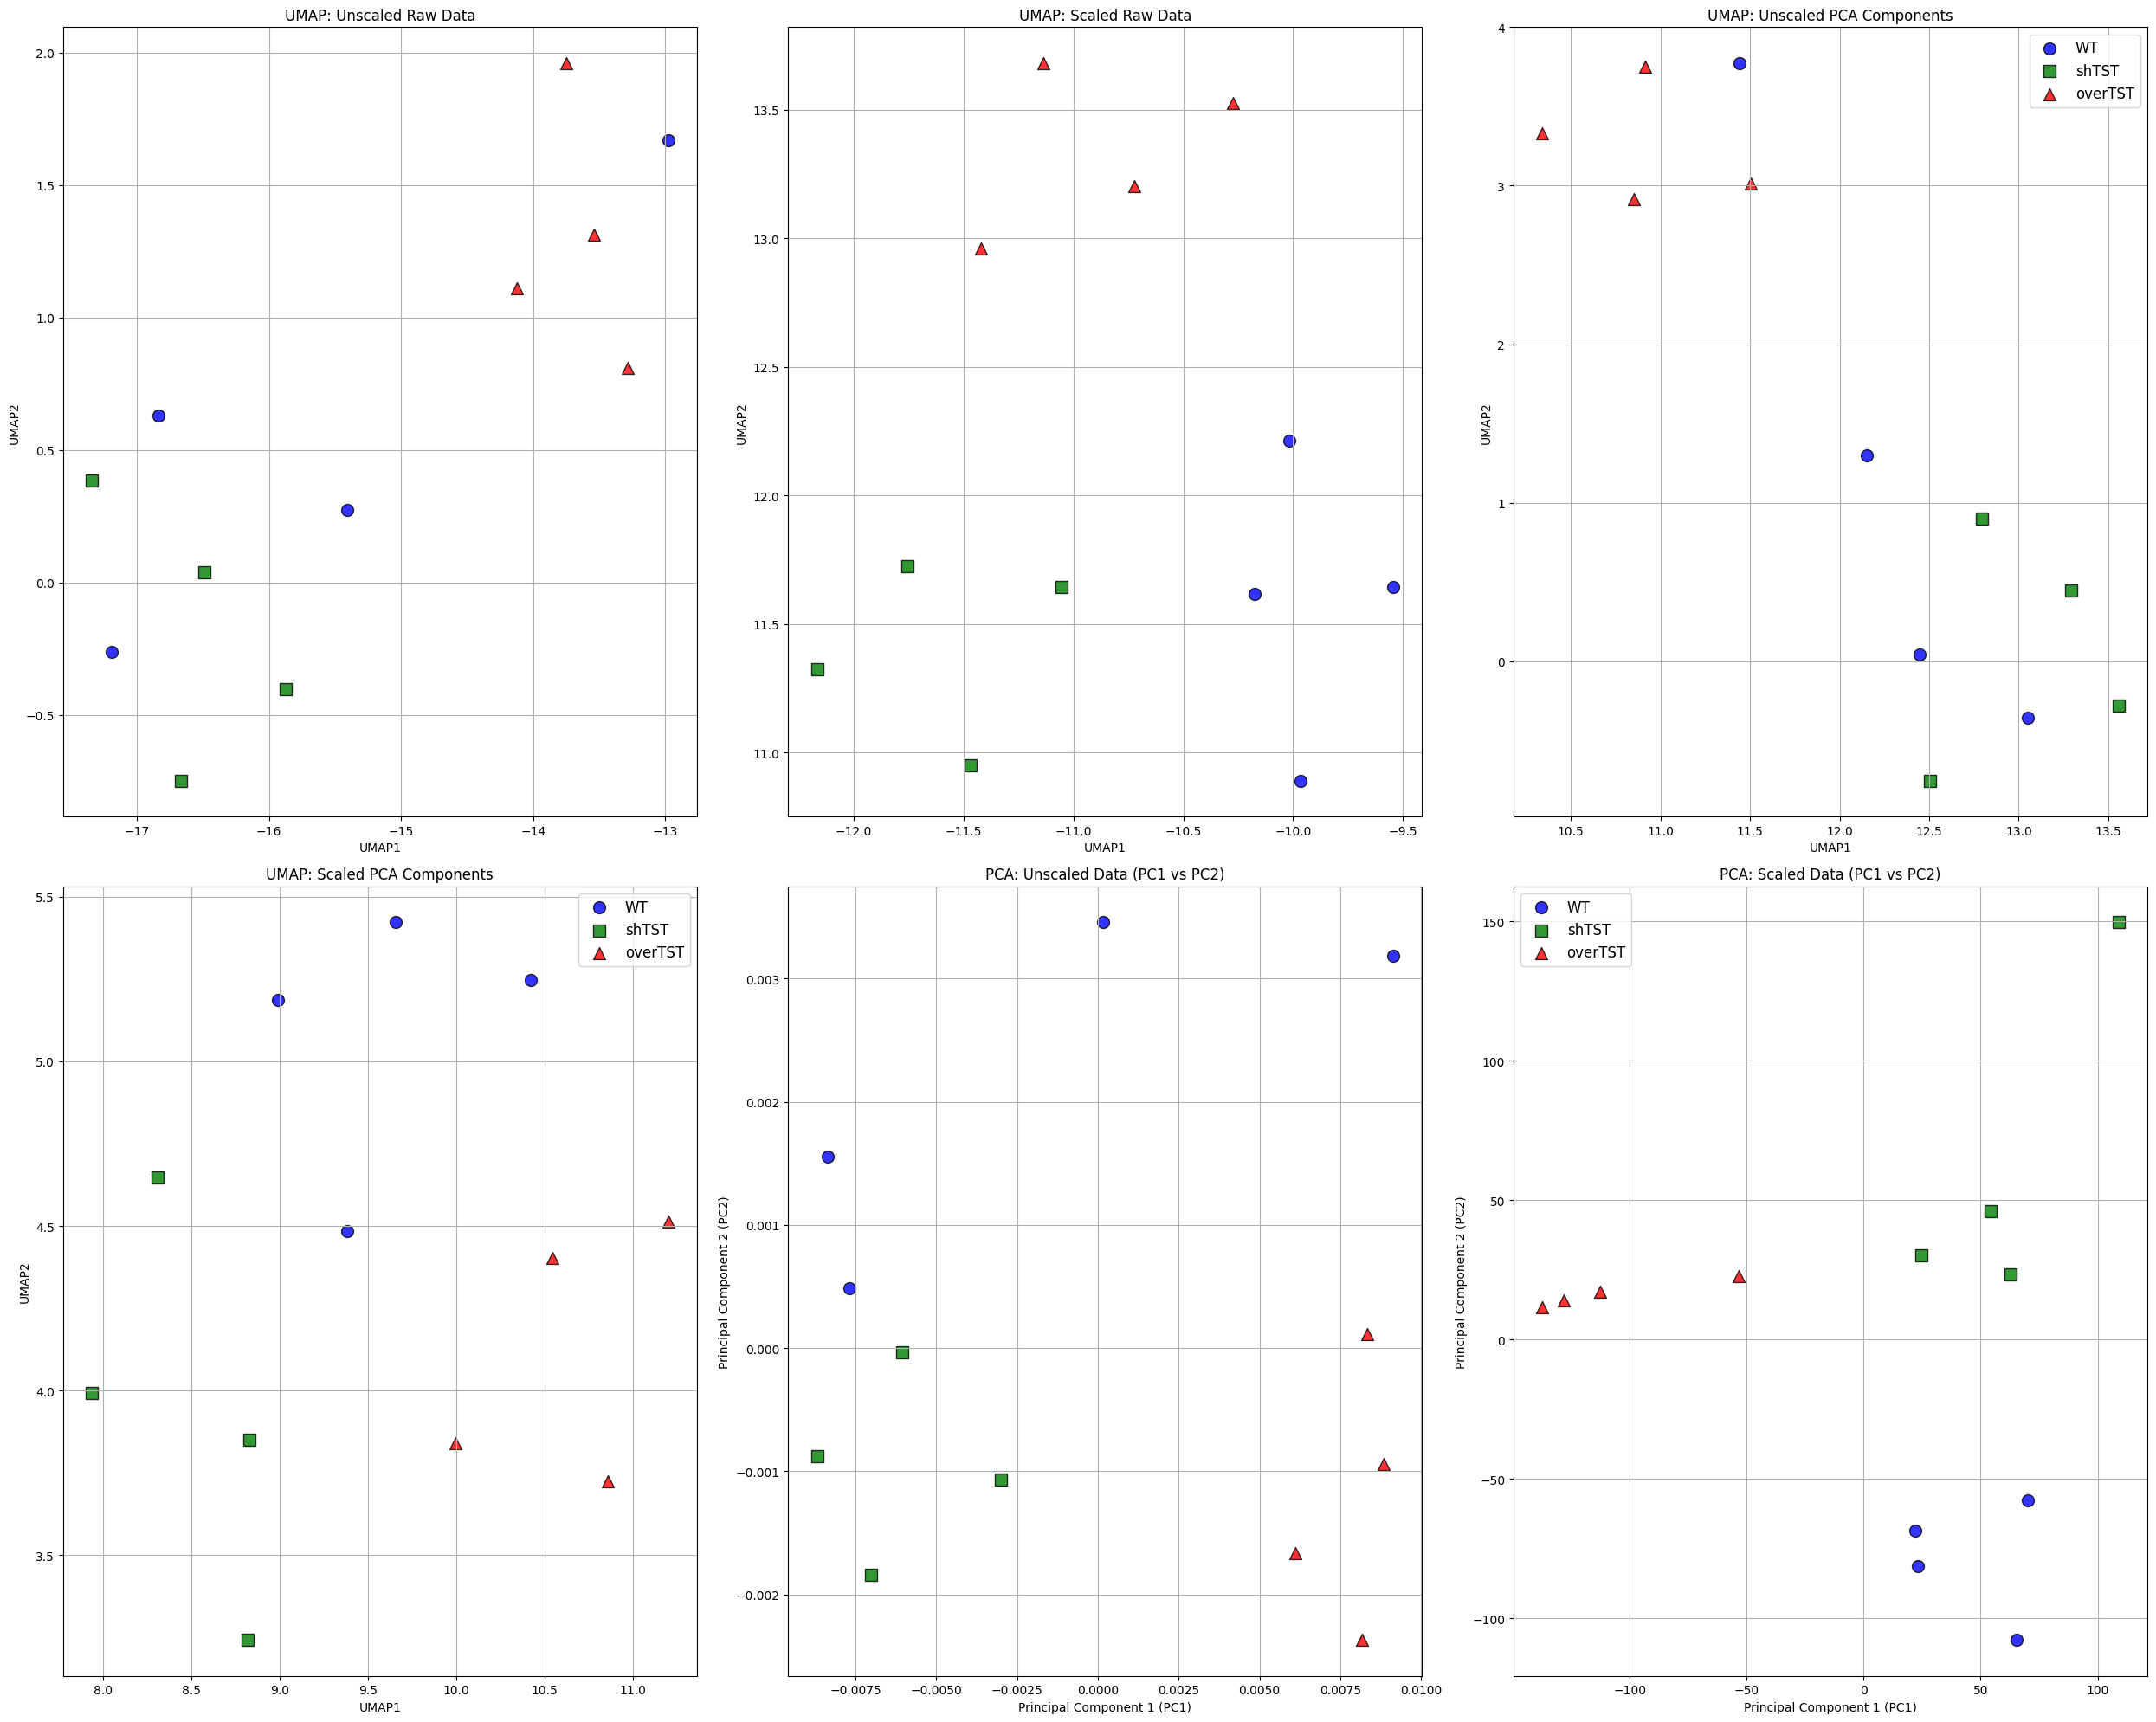

In [17]:
from sklearn.cluster import KMeans

bulk_data_normalized.index = bulk_data_normalized.index.astype(str)
bulk_data_normalized['Group'] = bulk_data_normalized.index.map(categorize_sample)

# Separate the data from the groups
labels = bulk_data_normalized['Group']
data = bulk_data_normalized.drop('Group', axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform KMeans clustering on the data
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters if needed
cluster_labels = kmeans.fit_predict(data)

### PCA ###

# Number of PCA components
n_PCA_Comps = 10

# Perform PCA on unscaled data
pca_unscaled = PCA(n_components=n_PCA_Comps)
principal_components_unscaled = pca_unscaled.fit_transform(data)

# Perform PCA on scaled data
pca_scaled = PCA(n_components=n_PCA_Comps)
principal_components_scaled = pca_scaled.fit_transform(scaled_data)

# Create DataFrames of the PCA results
pca_unscaled_df = pd.DataFrame(data=principal_components_unscaled, columns=[f'PC{i+1}' for i in range(n_PCA_Comps)])
pca_unscaled_df['Group'] = labels.values

pca_scaled_df = pd.DataFrame(data=principal_components_scaled, columns=[f'PC{i+1}' for i in range(n_PCA_Comps)])
pca_scaled_df['Group'] = labels.values

### UMAP ###
umap_model = umap.UMAP(n_components=2)

# UMAP on unscaled data
umap_unscaled_data = umap_model.fit_transform(data)
umap_unscaled_data_df = pd.DataFrame(data=umap_unscaled_data, columns=['UMAP1', 'UMAP2'])
umap_unscaled_data_df['Group'] = labels.values

# UMAP on scaled data
umap_scaled_data = umap_model.fit_transform(scaled_data)
umap_scaled_data_df = pd.DataFrame(data=umap_scaled_data, columns=['UMAP1', 'UMAP2'])
umap_scaled_data_df['Group'] = labels.values

# UMAP on PCA unscaled
umap_unscaled_PCA = umap_model.fit_transform(principal_components_unscaled)
umap_unscaled_PCA_df = pd.DataFrame(data=umap_unscaled_PCA, columns=['UMAP1', 'UMAP2'])
umap_unscaled_PCA_df['Group'] = labels.values

# UMAP on PCA scaled
umap_scaled_PCA = umap_model.fit_transform(principal_components_scaled)
umap_scaled_PCA_df = pd.DataFrame(data=umap_scaled_PCA, columns=['UMAP1', 'UMAP2'])
umap_scaled_PCA_df['Group'] = labels.values

# Create a single figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(25, 20))  # 2 rows, 3 columns

# Data for the UMAP plots (all 4 UMAP datasets)
umap_data = [
    (umap_unscaled_data_df, "UMAP: Unscaled Raw Data"),
    (umap_scaled_data_df, "UMAP: Scaled Raw Data"),
    (umap_unscaled_PCA_df, "UMAP: Unscaled PCA Components"),
    (umap_scaled_PCA_df, "UMAP: Scaled PCA Components")
]

# Define colors and markers for groups
unique_groups = labels.unique()
colors = ['blue', 'green', 'red']  # Distinct colors for better visualization
markers = ['o', 's', '^']  # Different markers for each group

# Loop through the axes and UMAP data to plot
for i, ax in enumerate(axes[0, :3].flatten()):  # First row, 3 columns
    df, title = umap_data[i]
    for group, color, marker in zip(unique_groups, colors, markers):
        subset = df[df['Group'] == group]
        ax.scatter(subset['UMAP1'], subset['UMAP2'], marker=marker, s=100, color=color, label=group, alpha=0.8, edgecolor='k')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_title(title)
    ax.grid(True)
    if i == 2:
        ax.legend(loc='best', fontsize=12)  # Add legend to the last plot in the first row

# Plot the 4th UMAP plot in the last subplot (bottom-left)
df, title = umap_data[3]  # This is the 4th UMAP dataset
for group, color, marker in zip(unique_groups, colors, markers):
    subset = df[df['Group'] == group]
    axes[1, 0].scatter(subset['UMAP1'], subset['UMAP2'], marker=marker, s=100, color=color, label=group, alpha=0.8, edgecolor='k')
axes[1, 0].set_xlabel('UMAP1')
axes[1, 0].set_ylabel('UMAP2')
axes[1, 0].set_title(title)
axes[1, 0].grid(True)
axes[1, 0].legend(loc='best', fontsize=12)

# Data for the PCA plots
pca_data = [
    (pca_unscaled_df, "PCA: Unscaled Data (PC1 vs PC2)"),
    (pca_scaled_df, "PCA: Scaled Data (PC1 vs PC2)")
]

# Loop through the axes and PCA data to plot (second row, 2 columns)
for i, ax in enumerate(axes[1, 1:]):  # Second row, 2 columns
    df, title = pca_data[i]
    for group, color, marker in zip(unique_groups, colors, markers):
        subset = df[df['Group'] == group]
        ax.scatter(subset['PC1'], subset['PC2'], marker=marker, s=100, color=color, label=group, alpha=0.8, edgecolor='k')
    ax.set_xlabel('Principal Component 1 (PC1)')
    ax.set_ylabel('Principal Component 2 (PC2)')
    ax.set_title(title)
    ax.grid(True)
    if i == 1:
        ax.legend(loc='best', fontsize=12)  # Add legend to the last plot in the second row

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()